In [1]:
cd C:\Users\Emre\Desktop

C:\Users\Emre\Desktop


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [3]:
df = pd.read_table('hu.txt', sep=",")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
print(df.shape)
#nxm table

(297, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  goal      297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
#sns.pairplot(df)
#plt.savefig('pairplot.png', dpi=300, bbox_inches='tight') #bbox removes white space around plots

In [8]:
#cols_to_plot = ['age', 'sex', 'cp']
#sns.pairplot(df[cols_to_plot], diag_kind= 'hist', diag_kws={'color': 'red'})
#if we want to see some specific pairplots, we can put these together and plot them individually

In [9]:
#sns.heatmap(df)

In [10]:
#create datasets
train, test = train_test_split(df, test_size=0.65, random_state=1234)
x_train = train.drop('goal',axis=1) #axis=1 represents columns axis=0 means rows
y_train = train.goal
x_test = test.drop('goal',axis=1)
y_test = test.goal

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
logreg = LogisticRegression()

In [13]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [14]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.68
Accuracy of Logistic regression classifier on test set: 0.57


In [15]:
acc = logreg.score(x_test,y_test)

In [16]:
pred = logreg.predict(x_test) #classifiers stored here

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[101   1   1   0   1]
 [ 32   2   5   0   0]
 [  8   3   4   4   1]
 [  4   9   8   3   0]
 [  1   3   1   2   0]]
              precision    recall  f1-score   support

           0       0.69      0.97      0.81       104
           1       0.11      0.05      0.07        39
           2       0.21      0.20      0.21        20
           3       0.33      0.12      0.18        24
           4       0.00      0.00      0.00         7

    accuracy                           0.57       194
   macro avg       0.27      0.27      0.25       194
weighted avg       0.46      0.57      0.49       194



C:\Users\Emre\miniconda3\envs\ifa_python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


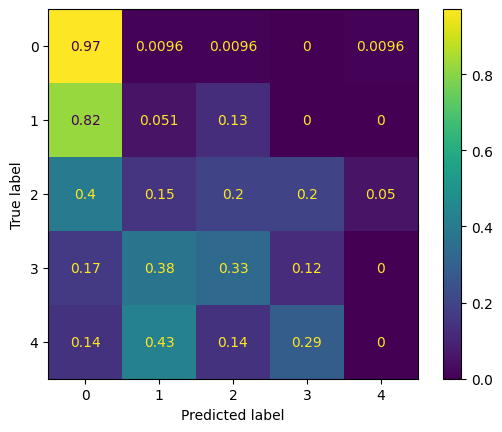

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg,x_test,y_test,normalize= "true")

In [19]:
#calculate Specitifity and Sensitivity works for matrix >2 
def calculate_spec_sens(cf):
    spec=[]*len(cf)
    sens=[]*len(cf)
    for i in range(len(cf)):
        sum_cf = cf.sum(axis=(0,1))
        TP = cf[i,i]
        TN = sum_cf - cf[:,i].sum() - cf[i,:].sum() + TP
        FP = cf[i,:].sum() - TP
        FN = cf[:,i].sum() - TP
        temp_spec = TN/(TN+FP)
        temp_sens = TP/(TP+FN)
        sens.append(temp_sens)
        spec.append(temp_spec)
    avg_spec = sum(spec)/len(cf)
    avg_sens = sum(sens)/len(cf)
    return avg_spec,avg_sens
    #for sensitivity we can use precision

In [20]:
avg_spec,avg_sens = calculate_spec_sens(cm)

In [21]:
acc

0.5670103092783505

<BarContainer object of 3 artists>

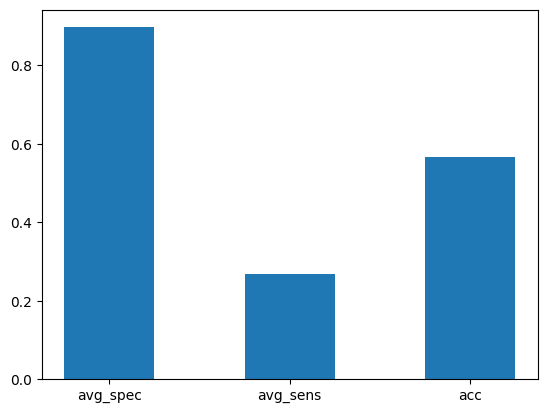

In [22]:
fig,ax = plt.subplots()
ax.bar([1,2,3],[avg_spec,avg_sens,acc], width=0.5,
        tick_label=['avg_spec','avg_sens','acc'], align='center')

In [23]:
spec,sens = calculate_spec_sens(cm)

In [24]:
spec,sens,acc

(0.8971744617994618, 0.26935031643034524, 0.5670103092783505)

<BarContainer object of 3 artists>

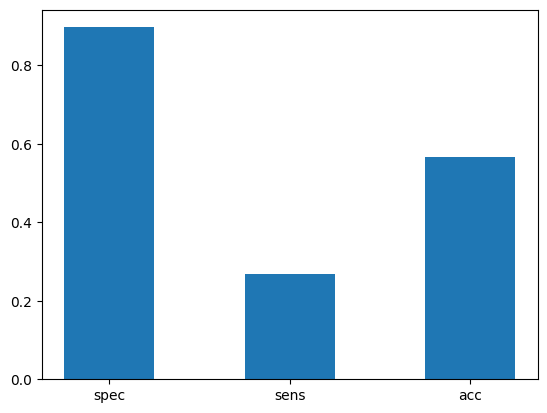

In [25]:
fig,ax = plt.subplots()
ax.bar([1,2,3],[spec,sens,acc], width=0.5,
        tick_label=['spec','sens','acc'], align='center')

In [27]:
df["goal"][df["goal"] > 0] = 1

C:\Users\Emre\AppData\Local\Temp\ipykernel_13444\2726144558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["goal"][df["goal"] > 0] = 1


In [28]:
df["goal"].unique()

array([0, 1], dtype=int64)

In [29]:
#rerun for 1 and 0 

In [30]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.35, random_state=1234, shuffle=True)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
logreg = LogisticRegression()

In [33]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [34]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.84
Accuracy of Logistic regression classifier on test set: 0.81


In [35]:
acc = logreg.score(x_test,y_test)

In [36]:
pred = logreg.predict(x_test) #classifiers stored here

In [37]:
cm = confusion_matrix(y_test, pred)

C:\Users\Emre\miniconda3\envs\ifa_python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


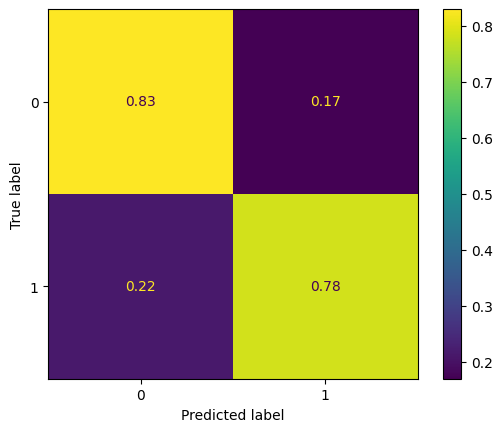

In [38]:
plot_confusion_matrix(logreg,x_test,y_test,normalize= "true")

In [39]:
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score 
#works only for 2x2

cm1 = cm
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[44  9]
 [11 40]]
Accuracy :  0.8076923076923077
Sensitivity :  0.8301886792452831
Specificity :  0.7843137254901961


<BarContainer object of 3 artists>

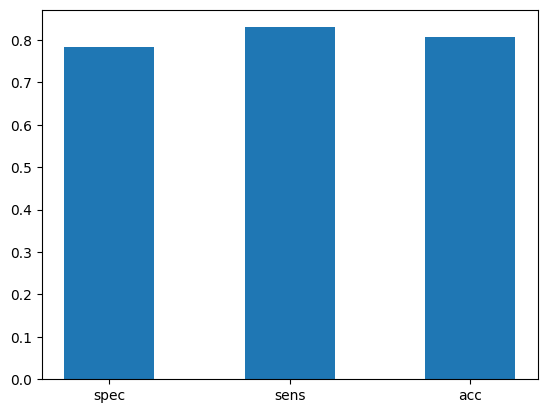

In [40]:
fig,ax = plt.subplots()
ax.bar([1,2,3],[specificity1,sensitivity1,accuracy1], width=0.5,
        tick_label=['spec','sens','acc'], align='center')

In [41]:
fpr,tpr,_ = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)

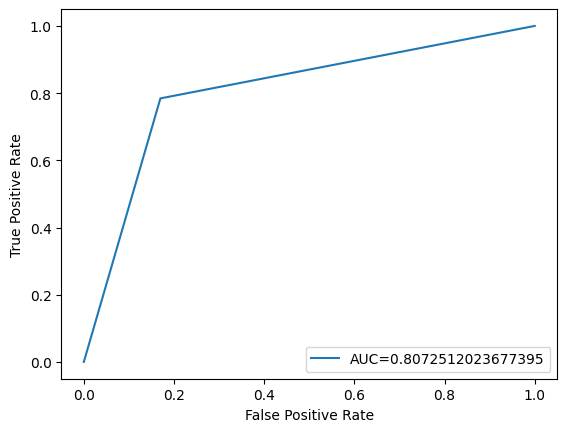

In [42]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()